# Connectionist Models II

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tools import *

#### Where we left off

We left off our last lab with a network of perceptrons that could take as input two binary values (both 0 or 1) and output the same as what a XOR operator would output: $x_1 \text{ XOR } x_2$. In particular, we "built" a XOR operator out of three perceptrons: one that had learned to mimic the OR operator, one for the AND operator, and one for the NAND operator.

Below is streamlined diagram of this network. The weights are still represented by lines, but we omit the specific weight values for simplicity. The circles (neurons) now more compactly represent both the integration (summation) of weighted inputs and the activation function. The inputs are now represented with circles as well, called input neurons.

<div style="text-align:center;">
    <br><br>
    <svg width="600" height="320" viewBox="0 0 600 300" transform="scale(1.5, 1.5)">
        <!-- Input Layer with Circles -->
        <circle cx="40" cy="100" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="35" y="105" font-size="12" fill="black">x₁</text>
        <circle cx="40" cy="200" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="35" y="205" font-size="12" fill="black">x₂</text>
        <!-- Connections to OR Neuron -->
        <line x1="60" y1="100" x2="190" y2="80" stroke="black" stroke-width="2" />
        <line x1="60" y1="200" x2="190" y2="80" stroke="black" stroke-width="2" />
        <!-- Connections to NAND Neuron -->
        <line x1="60" y1="100" x2="190" y2="220" stroke="black" stroke-width="2" />
        <line x1="60" y1="200" x2="190" y2="220" stroke="black" stroke-width="2" />
        <!-- OR Neuron (simplified) -->
        <circle cx="210" cy="80" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="201.5" y="85" font-size="12" fill="black">OR</text>
        <!-- NAND Neuron (simplified) -->
        <circle cx="210" cy="220" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="192.5" y="225" font-size="12" fill="black">NAND</text>
        <!-- Connections to AND (Output) Neuron -->
        <line x1="230" y1="80" x2="320" y2="150" stroke="black" stroke-width="2" />
        <line x1="230" y1="220" x2="320" y2="150" stroke="black" stroke-width="2" />
        <!-- AND (Output) Neuron (simplified) -->
        <circle cx="340" cy="150" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="327" y="155" font-size="12" fill="black">AND</text>
        <!-- Output -->
        <!-- <line x1="360" y1="150" x2="400" y2="150" stroke="black" stroke-width="2" /> -->
        <!-- <text x="410" y="155" font-size="12" fill="black">XOR Output</text> -->
    </svg>
</div>

Recall that the network has **(1)** an input layer, **(2)** a hidden layer, and **(3)** an output layer.

A network of perceptrons with at least one hidden layer is called a **multi-layer perceptron (MLP)**.

Let's visualize what happens when $x_1 = 0$ and $x_2 = 1$:

<div style="text-align:center;">
    <br><br>
    <svg width="600" height="320" viewBox="0 0 600 300" transform="scale(1.5, 1.5)">
        <!-- Input Layer with Circles -->
        <circle cx="40" cy="100" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="35" y="105" font-size="12" fill="black">0</text>
        <circle cx="40" cy="200" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="35" y="205" font-size="12" fill="black">1</text>
        <!-- Connections to OR Neuron -->
        <line x1="60" y1="100" x2="190" y2="80" stroke="black" stroke-width="2" />
        <line x1="60" y1="200" x2="190" y2="80" stroke="black" stroke-width="2" />
        <!-- Connections to NAND Neuron -->
        <line x1="60" y1="100" x2="190" y2="220" stroke="black" stroke-width="2" />
        <line x1="60" y1="200" x2="190" y2="220" stroke="black" stroke-width="2" />
        <!-- OR Neuron (simplified) -->
        <circle cx="210" cy="80" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="206" y="85" font-size="12" fill="black">1</text>
        <!-- NAND Neuron (simplified) -->
        <circle cx="210" cy="220" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="206" y="225" font-size="12" fill="black">1</text>
        <!-- Connections to AND (Output) Neuron -->
        <line x1="230" y1="80" x2="320" y2="150" stroke="black" stroke-width="2" />
        <line x1="230" y1="220" x2="320" y2="150" stroke="black" stroke-width="2" />
        <!-- AND (Output) Neuron (simplified) -->
        <circle cx="340" cy="150" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="336" y="155" font-size="12" fill="black">1</text>
        <!-- Output -->
        <!-- <line x1="360" y1="150" x2="400" y2="150" stroke="black" stroke-width="2" /> -->
        <!-- <text x="410" y="155" font-size="12" fill="black">XOR Output</text> -->
    </svg>
</div>

Notice that the input layer contains two features, 0 and 1, but the hidden layer contains two *different* numbers, 1 and 1. 

The relationship between the two is that the first set of numbers have been *transformed* into the second set of numbers (i.e., `hidden_layer_output = first_two_perceptrons(x_1, x_2)`).

Thus, we can think of the second set of numbers as two **new** features, or a new *representation* of the input, called a **hidden representation**.

**Exercise:** What is the hidden representation (from top to bottom) produced by the above network for the following inputs: $x_1 = 0$ and $x_2 = 0$?

In [87]:
hidden_representation = [0, 1]

In [88]:
# TEST YOUR SOLUTION
'Test passed' if hidden_representation == [min(range(1, 40)), min(range(71))][::-1] else 'Test failed'

'Test passed'

After the first layer transforms the input, the output layer takes that new representation as input and processes it further to ultimately solve the problem at hand.

**Exercise:** What is the output of the above network with the following inputs: $x_1 = 0$ and $x_2 = 0$?

In [89]:
output_when_0_0 = 0

In [90]:
# TEST YOUR SOLUTION
'Test passed' if output_when_0_0 == min(range(9943)) else 'Test failed'

'Test passed'

#### MLPs as general models of cognition

The above tells us that MLPs provide general framework for doing two very important things:
1. they can **construct a new representation** of the input (i.e., of our senses / the world), and
2. they can **process that input / representation to solve problems** (such as categorization).

However, one glaring limitation of the MLP above is that we had to construct it by hand, one neuron at a time, and based on an explicit plan for how each perceptron will coordinate to solve the problem. 

Ideally, what we want instead is for the MLP to **learn** the weights for all three connected perceptrons **at the same time**, and as a consequence how they coordinate, on its own using error-driven learning.

That is, we'd set up the network above, initialize all 6 weights (and two thresholds) with some kind of arbitrary "starting" values, and then adjust them all at once until the output of the model looks like what we want.

Before we can understand how this is possible, we'll need to make some small improvements to our basic model of a single neuron that are often used in MLPs.

#### Upgrading our single-neuron model

Recall that our activation function was defined as the step function:

$$
\phi(z) =
\begin{cases} 
0 & \text{if } z < t \\
1 & \text{if } z \geq t
\end{cases}
$$

In Python:

In [91]:
def step_function(z, t):
    if z < t:
        return 0
    else:
        return 1

In modern MLPs, a simpler function is used that is both equivalent to the above yet has a fixed threshold of 0. To see how this is possible, let's first define a zero-threshold function:

$$
\phi'(z) =
\begin{cases} 
0 & \text{if } z < 0 \\
1 & \text{if } z \geq 0
\end{cases}
$$

**Exercise**: Create a function called `zero_threshold` that takes in a single value $z$ and returns $\phi(z)$.

In [92]:
# Your code here

def zero_threshold(z):
    return 0 if z < 0 else 1

In [93]:
# TEST YOUR SOLUTION
'Test passed' if zero_threshold(-0.00000001) == 0 and zero_threshold(0.00000001) == 1 else 'Test failed'

'Test passed'

Now, let's consider what would happen if we input $z' = z - t$ into this new function:

$$
\phi'(z') = \phi'(z - t) =
\begin{cases} 
0 & \text{if } (z - t) < 0 \\
1 & \text{if } (z - t) \geq 0
\end{cases}
$$

We can simplify both inequalities by adding $t$ to both sides of each:
- $(z - t) + t < 0 + t$ becomes $z < t$
- $(z - t) + t \geq 0 + t$ becomes $z \geq t$

This gives us:

$$
\phi'(z - t) =
\begin{cases} 
0 & \text{if } z < t \\
1 & \text{if } z \geq t
\end{cases} = \phi(z)
$$

**Exercise:** Let's verify this. Fill in the blanks to show how $\phi$ and $\phi'$ can be used equivalently.

In [94]:
# do not change
z = 1
t = 2

# fill in the blanks
are_the_same = step_function(z, t) == zero_threshold(z - t)

# do not change
print(are_the_same)

True


In [95]:
# TEST YOUR SOLUTION
'Test passed' if are_the_same else 'Test failed'

'Test passed'

The fact that $\phi(z) = \phi'(z - t)$ tells us that **we can use a zero-threshold step function as long as we subtract the true threshold $t$ from the input** to that function.

If we recall that the input to the step function is $z = \sum_i x_i w_i$ (the sum of weighted inputs to a neuron), then $$z' = z - t = \sum_i x_i w_i - t,$$ and our full model of a neuron becomes:

$$a = \phi'(z') = \phi'(z - t) = \phi'(\sum_i x_i w_i - t).$$

Under this (equivalent) model of a neuron, $-t$ is called the **bias term**, and is denoted as $b$. We can rewrite the statement above in these terms as:

$$a = \phi'(\sum_i x_i w_i + b).$$

**Exercise:** Create a model of a neuron using a function called `neuron_with_bias` that takes in two inputs, two weights, and a bias term and returns the activation of that neuron.

In [96]:
# Your code here

def neuron_with_bias(x1, x2, w1, w2, b):
    return zero_threshold((x1*w1) + (x2*w2) + b)

In [97]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(neuron_with_bias(0.5, 1, 2, 1.5, -3.6), 0) else 'Test failed'

'Test passed'

Next, while real neurons activate relative to a threshold, their behavior is not actually an "all or nothing" step function, but rather a sort of "smooth" step function that activates in a more graded fashion. A common way to model such behavior is to use the **sigmoid** activation function:

$$\phi(z) = \frac{1}{1 + e^{-z}}$$

**Exercise:** Create a function called `sigmoid` that takes in a single value $z$ and returns $\phi(z)$.

In [98]:
# Your code here

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [99]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(sigmoid(0), 0.5) and np.isclose(sigmoid(1), 0.7310585786300049) else 'Test failed'

'Test passed'

Let's see what this function looks like:

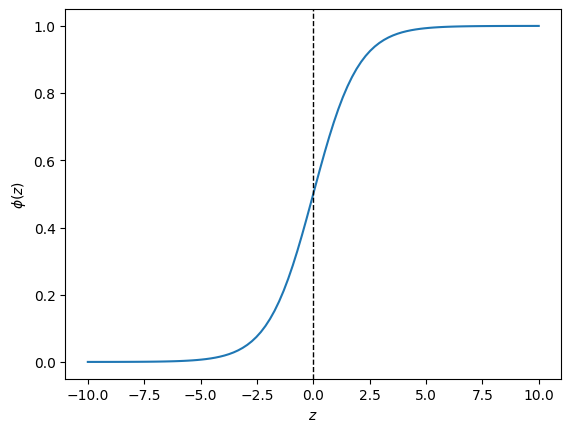

In [100]:
z = np.linspace(-10, 10, 100); phi_z = sigmoid(z); plt.plot(z, phi_z)
plt.xlabel(r'$z$'); plt.ylabel(r'$\phi(z)$')
plt.axvline(0, color='black', linestyle='--', lw=1);

Note the following about this function:
- It looks very much like a step function, but smoother.
- It's symmetric around 0 (i.e., 0 is still the threshold).
- It activates for values near the threshold on both sides.
- It activates more the more the threshold is exceeded.
- It outputs 0.5 when the input is 0.

Also notice that the output is between 0 and 1. This makes it useful as an output neuron for many relevant problems such as predicting proportions (e.g., categorization or decision proportions), but it is also commonly used for hidden neurons as well.

**Exercise:** Create a model of a neuron with a sigmoid activation function using a function called `neuron_with_sigmoid` that takes in two inputs, two weights, and a bias term and returns the activation of that neuron.

In [101]:
# Your code here

def neuron_with_sigmoid(x1, x2, w1, w2, b):
    return sigmoid((x1*w1) + (x2*w2) + b)

In [102]:
# TEST YOUR SOLUTION
print(neuron_with_sigmoid(0.5, 1, 2, 1.5, -3.6))
'Test passed' if np.isclose(neuron_with_sigmoid(0.5, 1, 2, 1.5, -3.6), 0.47502081252106) else 'Test failed'

0.24973989440488234


'Test failed'

We've now arrived at the modern formulation of an artificial neuron that's typically used in MLPs.

#### Building an MLP

Now, let's actually build an MLP out of three of these neurons that we'll eventually use to learn to mimic the XOR operator (i.e., to categorize inputs correctly).

**Exercise:** Create a function called `MLP` that takes in two inputs (to the MLP) as well as the weights and biases for the three neurons in the network and outputs the output of the MLP. 

Specifically, the function should take in the following arguments:
- Inputs `x1` and `x2`
- Weights and biases for the first neuron: `n1_w1`, `n1_w2`, `n1_b`
- Weights and biases for the second neuron: `n2_w1`, `n2_w2`, `n2_b`
- Weights and biases for the third neuron: `n3_w1`, `n3_w2`, `n3_b`

The overall argument order should be `x1, x2, n1_w1, n1_w2, n1_b, n2_w1, n2_w2, n2_b, n3_w1, n3_w2, n3_b`.

In [103]:
# Your code here

def MLP(x1, x2, n1_w1, n1_w2, n1_b, n2_w1, n2_w2, n2_b, n3_w1, n3_w2, n3_b):
    a1 = neuron_with_sigmoid(x1, x2, n1_w1, n1_w2, n1_b)
    a2 = neuron_with_sigmoid(x1, x2, n2_w1, n2_w2, n2_b)
    return neuron_with_sigmoid(a1, a2, n3_w1, n3_w2, n3_b)

In [104]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(MLP(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0), 0.5) else 'Test failed'

'Test passed'

Let's load in our XOR category data so we can assess the accuracy of this model in the category learning task.

In [105]:
df_xor = pd.DataFrame({
    'feature1': [0, 0, 1, 1],
    'feature2': [0, 1, 0, 1],
    'category': [0, 1, 1, 0]
})
df_xor

,feature1,feature2,category
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


Let's check the accuracy of our MLP on this data.

Because the output neuron of the MLP is a sigmoid function, it now outputs a number between 0 and 1 rather than exactly 0 or 1. Thus, to assess accuracy (for now), we'll simply assume that the network is choosing category 1 when its output is equal to or greater than 0.5.

Let's create a function that evaluates the accuracy of the MLP.

**Exercise:** Fill in the blanks.

In [106]:
def evaluate_accuracy(df, parameters):

    # unpack the parameters for the MLP
    n1_w1, n1_w2, n1_b, n2_w1, n2_w2, n2_b, n3_w1, n3_w2, n3_b = parameters

    # to count #/4 we get right
    correct_predictions = 0

    # go through each of the four stimuli
    for _, row in df.iterrows():

        # features and correct category for this stimulus
        x1 = row['feature1']
        x2 = row['feature2']
        y = row['category']

        # see what the MLP outputs for this stimulus
        y_pred = MLP(x1, x2, n1_w1, n1_w2, n1_b, n2_w1, n2_w2, n2_b, n3_w1, n3_w2, n3_b)

        # if the prediction is correct, tally it up
        if y_pred >= 0.5 and y == 1:
            correct_predictions = correct_predictions + 1
        elif y_pred < 0.5 and y == 0:
            correct_predictions = correct_predictions + 1
    
    # return the accuracy %
    accuracy = correct_predictions / len(df) * 100
    return accuracy

In [107]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(evaluate_accuracy(df_xor, [0, 0, 0, 0, 0, 0, 0, 0, 0]), 50.0) else 'Test failed'

'Test passed'

In order to assess accuracy, we need to choose some initial parameters. Let's use 0.1 for all of them.

**Exercise:** Evaluate the accuracy of an MLP with parameters all set to 0.1. Store the result in `accuracy_with_init_params`.

In [108]:
# Your code here
accuracy_with_init_params = evaluate_accuracy(df_xor, [0.1] * 9)

# do not change
accuracy_with_init_params

50.0

In [109]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(accuracy_with_init_params, 50.0) else 'Test failed'

'Test passed'

The current accuracy is 50%, which isn't very good, and certainly doesn't solve the XOR problem.

In order to improve this score, we'll need the MLP to **learn** better values for all 9 parameters.

Before we can do this, we'll first need a more fine-grained measure of error.

#### Measuring error in greater detail

 Note that when the correct category $y$ for an input stimulus is 1, we want the output $\hat{y}$ to be as close as possible to 1. When correct category is 0, we want the output to be close to 0.

A function that measures the discrepancy between what an MLP outputs and what we want it to output is called a **loss function**. The output of the loss function is denoted as $\mathcal{L}$.

We can use a measure of difference between the true category and the output of the model that we've used before (e.g., for categorization models) such as squared error:

$$ \mathcal{L}= (y - \hat{y})^2 $$

**Exercise:** Create a function called `loss` that takes `y` and `y_pred` and return a single squared error value.

In [110]:
# Your code here

def loss(y, y_pred):
    return np.pow((y - y_pred), 2)

In [111]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(loss(0, 0.5), 0.25) and np.isclose(loss(1, 0.5), 0.25) else 'Test failed'

'Test passed'

Recall that the goal of error-driven learning is to adjust parameters such that this error is minimized. This was relatively simple when we only had a single neuron, but having multiple layers of neurons complicates this task.

To understand how it can be accomplished, let's briefly consider a much simpler MLP.

#### A minimal example

Consider the following MLP:

<div style="text-align:center;">
    <br><br>
    <svg width="400" height="200" viewBox="0 0 400 200" transform="scale(1.5, 1.5)">
        <!-- Input Neuron -->
        <circle cx="80" cy="100" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="77" y="105" font-size="12" fill="black">x</text>
        <!-- Connection to Hidden Neuron -->
        <line x1="100" y1="100" x2="180" y2="100" stroke="black" stroke-width="2" />
        <!-- Weight w_h label -->
        <text x="135" y="90" font-size="12" fill="black">wₕ</text>
        <!-- Hidden Neuron -->
        <circle cx="200" cy="100" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="196.5" y="105" font-size="12" fill="black">h</text>
        <!-- Connection to Output Neuron -->
        <line x1="220" y1="100" x2="300" y2="100" stroke="black" stroke-width="2" />
        <!-- Weight w_o label -->
        <text x="255" y="90" font-size="12" fill="black">wₒ</text>
        <!-- Output Neuron -->
        <circle cx="320" cy="100" r="20" fill="white" stroke="black" stroke-width="2" />
        <text x="317" y="105" font-size="12" fill="black">y</text>
    </svg>
</div>

Note the following about this MLP:
- It takes a single input $x$.
- The single input is connected to a single hidden neuron by a single weight $w_h$.
- The single hidden neuron is connected to a single output neuron by a single weight $w_o$.

Let's additionally make the following simplifying assumptions:
- The activation functions are just the identity function: $\phi(z) = z.$
- There are no bias terms (since the above has no threshold).

Thus, our extremely simple MLP can be described in just two steps:
1. A hidden neuron activation: $h = w_h x$
2. An output activation: $\hat{y} = w_o h$

Note that our error is still squared error $(y - \hat{y})^2$, and we still want to minimize this error. 

#### Minimizing error

In order to minimize the error, we need to start from that error and work our way backwards to how the weights affect it. Let's see how this works in practice.

The first question we have to ask is how changes in $y - \hat{y}$ in turn change the total error $(y - \hat{y})^2$. We can make use of some calculus to tell us the answer to this. In calculus terms, we say we want the *derivative* of the function $(y - \hat{y})^2$ with respect to its input $y - \hat{y}$.

Recall that the derivative of a polynomial function such as $v^n$ is just $nv^{n-1}$. Thus, if we let $v = y - \hat{y}$, then the derivative of $v^2$ is $2v = 2(y - \hat{y})$. Thus, we now know how $(y - \hat{y})^2$ changes as $y - \hat{y}$ changes. Let's think about what that means. $2(y - \hat{y})$ is just $2$ times what is being changed ($y - \hat{y}$). Thus, what this tells us is that the squared error changes **twice** as fast as the difference changes.

Consider an example:

**Exercise:** Fill in the blanks.

In [112]:
# When the difference is 1
diff1 = (4 - 3)
print("diff1 =", diff1)
squared_diff1 = diff1 ** 2
print("squared_diff1 =", squared_diff1)

# When the difference is 2
diff2 = (4 - 2)
print("diff2 =", diff2)
squared_diff2 = diff2 ** 2
print("squared_diff2 =", squared_diff2)

diff1 = 1
squared_diff1 = 1
diff2 = 2
squared_diff2 = 4


In [113]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(squared_diff1, 1) and np.isclose(squared_diff2, 4) else 'Test failed'

'Test passed'

Note that the change from diff1 (1) to diff2 (2) is that diff1 was doubled. However, the change from squared_diff1 to squared_diff2 (as a result of changing diff) is that squared_diff1 was quadrupled. Thus, the squared difference changed **twice** as fast as the difference.

Also recall that derivatives tell us about more than just relative change; they also tell us about direction. The sign of a derivative tells us whether increasing a variable will increase or decrease the function we're examining (the squared error loss function in our case). A positive derivative means that increasing the variable increases the function value, while a negative derivative means increasing the variable decreases the function value.

In our current example with $(y - \hat{y})^2$, we find that the derivative with respect to $(y - \hat{y})$ is $2(y - \hat{y})$. This follows the general principle: when $(y - \hat{y})$ is positive, increasing it further will increase error, and when it's negative, increasing it will decrease error.

#### Further down the network

We know now how $y - \hat{y}$ causes $(y - \hat{y})^2$ to change, but now, what causes $y - \hat{y}$ to change? You can see that we are now starting to "work backwards" to identify what indirectly changes the error and by how much.

$y - \hat{y}$ does not change as function of $y$, because we can't adjust $y$. It only changes as a function of the model's output $\hat{y}$. Thus we also want the derivative of $y - \hat{y}$ with respect to $\hat{y}$.

Recall that the derivative of a constant (e.g., $y$) is 0, the derivative of a variable (e.g., $\hat{y}$) is 1, and the derivative of a sum is the sum of the derivatives, so the derivative of $y - \hat{y}$ is $0 - 1 = -1$.

We now know both how $(y - \hat{y})^2$ changes as $y - \hat{y}$ changes, and how $y - \hat{y}$ changes as $\hat{y}$ changes. Now we need to "chain" these two bits of information together to figure out how $(y - \hat{y})^2$ changes directly with respect to $\hat{y}$. Recall that the chain rule from calculus tells us how to do this by combining the two derivatives (taking the product of them). Thus, the derivative of $(y - \hat{y})^2$ with respect to $\hat{y}$ is simply $-1 \times 2(y - \hat{y}) =  -2(y - \hat{y})$. 

But we still aren't done, because $\hat{y}$ itself varies as a function of the adjustable weight $w_o$ since $\hat{y} = w_o h$.

If we were to keep going deeper, and re-applying the chain rule, we would end up the two derivatives we really care about:
1. The derivative of $(y - \hat{y})^2$ with respect to $w_o$, and
2. The derivative of $(y - \hat{y})^2$ with respect to $w_h$ (even deeper).

These two derivatives tell us how much adjusting each weight will affect the error.

Applying the chain rule to the error function of a neural network to determine how weights affect the error is called **backpropagation**.

**We will complete these calculations more fully in the next homework assignment.**

For now, we can note that the derivatives for $w_o$ and $w_h$ respectively are:
- $-2(y - \hat{y}) \cdot h$
- $-2(y - \hat{y}) \cdot w_o \cdot x$

Let's try one of them out.

**Exercise:** Create a function called `w_o_derivative` that takes `y`, `y_pred`, and `h` as inputs and outputs the derivative of $(y - \hat{y})^2$ with respect to $w_o$.

In [114]:
# Your code here

def w_o_derivative(y, y_pred, h):
    return -2 * (y - y_pred) * h

In [115]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(w_o_derivative(0, 0.5, 0.5), 0.5) and np.isclose(w_o_derivative(1, 0.5, 0.5), -0.5) else 'Test failed'

'Test passed'

Consider the example where we want to output a value of 3, but we are currently outputting a value of 2. Also, let's assume the hidden activation is a value of 1.

**Exercise:** Fill in the blanks.

In [116]:
y = 3
y_pred = 2
h = 1

In [117]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(w_o_derivative(y, y_pred, h), -2) else 'Test failed'

'Test passed'

Note that our output is 1 less than it should be (2 instead of 3).

If $h = 1$, then that means that $w_o$ must currently be 2 (in order to produce $\hat{y} = 2$).

Obviously, to increase the value of $\hat{y}$, we have to increase $w_o$.

Let's see if our derivative function agrees.

**Exercise:** Use `w_o_derivative` to compute the derivative using the values above, and store the result in `w_o_deriv`.

In [118]:
# Your code here

w_o_deriv = w_o_derivative(3, 2, 1)

# do not change
w_o_deriv

-2

In [119]:
# TEST YOUR SOLUTION
'Test passed' if np.isclose(w_o_deriv, -2) else 'Test failed'

'Test passed'

`w_o_deriv` is -2, but the negative sign here doesn't mean we decrease $w_o$. In fact, we already said we want to increase $w_o$. Instead, the negative sign of the derivative tells us that error goes down when $w_o$ goes up.

Thus, we want to move $w_o$ in the opposite direction of this sign. This will always be true: we will always move parameters in the opposite direction of the derivative because we want to minimize error rather than maximize it.

Further, the 2 part of -2 doesn't mean we adjust $w_o$ by 2. Remember, it's telling us about relative change. For example, if we were to increase $w_o$ by a tiny amount (let's say 0.001), the error would decrease by approximately 2 times that, or 0.002.

Just like our perceptron, whenever we make adjustments, we will always make small ones, again using a learning rate $\eta$ to determine how far we jump.

Thus, much like our original perceptron learning rules, we've now arrived at an update rule for each of our weights:

$$w_o^{new} = w_o - (-2\eta(y - \hat{y}) \cdot h)$$

$$w_h^{new} = w_h - (-2\eta(y - \hat{y}) \cdot w_o \cdot x).$$

#### Learning to solve the XOR problem

Now, let's go back to our larger MLP that we set up to learn to solve the XOR problem. There are many more weights to update in this model, and the derivatives are more complicated because we have to account for the nonlinear activation functions. Rather than calculate them all now, which is quite involved, a function has been provided to you to calculate derivatives for each model parameter and return updated values.

The function, `update_mlp_params`, takes in a list of parameters (just like `evaluate_accuracy` does), a single `datapoint` (one row of the XOR dataframe), and a learning rate `eta`, and returns a set of updated parameters based on that single datapoint.

**Exercise:** Fill in the blanks to complete the algorithm below. Use a learning rate of 2. 

In [121]:
# initialize the parameters as random values
np.random.seed(0)
params = np.random.randn(9) * 2

# 500 learning iterations through the data
for i in range(500):

    # learn from each of the four stimuli, one at a time
    for _, row in df_xor.iterrows():
        params = update_mlp_params(params, row, 2)

    # check accuracy after each update
    acc = evaluate_accuracy(df_xor, params)

    # check mse after each update
    squared_error = 0
    for _, row in df_xor.iterrows():
        y = row['category']
        y_pred = MLP(row['feature1'], row['feature2'], *params)
        squared_error += loss(y, y_pred)
    mean_squared_error = squared_error / len(df_xor)

    # report current scores
    print(f"Iteration {i}, MSE: {mean_squared_error:.4f}, Accuracy: {acc:.2f}%")

Iteration 0, MSE: 0.2914, Accuracy: 50.00%
Iteration 1, MSE: 0.2690, Accuracy: 50.00%
Iteration 2, MSE: 0.2597, Accuracy: 50.00%
Iteration 3, MSE: 0.2540, Accuracy: 50.00%
Iteration 4, MSE: 0.2494, Accuracy: 50.00%
Iteration 5, MSE: 0.2451, Accuracy: 75.00%
Iteration 6, MSE: 0.2412, Accuracy: 75.00%
Iteration 7, MSE: 0.2376, Accuracy: 75.00%
Iteration 8, MSE: 0.2342, Accuracy: 75.00%
Iteration 9, MSE: 0.2311, Accuracy: 75.00%
Iteration 10, MSE: 0.2282, Accuracy: 75.00%
Iteration 11, MSE: 0.2255, Accuracy: 75.00%
Iteration 12, MSE: 0.2230, Accuracy: 75.00%
Iteration 13, MSE: 0.2206, Accuracy: 75.00%
Iteration 14, MSE: 0.2183, Accuracy: 75.00%
Iteration 15, MSE: 0.2162, Accuracy: 75.00%
Iteration 16, MSE: 0.2143, Accuracy: 75.00%
Iteration 17, MSE: 0.2124, Accuracy: 75.00%
Iteration 18, MSE: 0.2106, Accuracy: 75.00%
Iteration 19, MSE: 0.2089, Accuracy: 75.00%
Iteration 20, MSE: 0.2074, Accuracy: 75.00%
Iteration 21, MSE: 0.2059, Accuracy: 75.00%
Iteration 22, MSE: 0.2045, Accuracy: 75.00

In [122]:
# TEST YOUR SOLUTION
'Test passed' if acc == 100.0 else 'Test failed'

'Test passed'

Our MLP reached a very low MSE value, and an accuracy of 100%. This means it learned to solve the XOR problem (i.e., it learned the two categories), as well a representation that enables it to do so, all on it's own. This is in contrast to the set of three perceptrons that we pre-learned and hand-connected together in the last lab.

Thus, MLPs provide at least one general way that we might explain both mental representations and cognitive processes. That is, they don't just tell us how `behavior = cognitive_process(stimulus/representation)`, but also from where `representation` and `cognitive_process` might originate **as a result of learning**. This was first pointed out in a famous paper by the psychologist **David Rumelhart** and his colleagues in 1986. While MLPs are not the only models with such abilities, they have remained a popular choice of many psychologists in trying to understand and model the mind. The position that such models can be used to understand the mind is called **connectionism**.

MLPs, especially large ones with many neurons and layers, have also become popular engineering tools, meant to learn solve problems in general rather than just as models of how the mind might solve them. The use of large MLPs with many hidden layers to solve practical problems is called **deep learning**. Deep learning is one of the most popular methods of **machine learning**, or the development and application of computer algorithms that can learn to solve problems. In fact, current AI models such as ChatGPT and others are essentially just **very large** MLPs with a few extra bells and whistles. We'll explore this connection more in a future lecture.